In [320]:
import os
import sys
sys.path.append(r"../")
import numpy as np
import matplotlib.pyplot as plt
# from nodes.HR import HR
from nodes.HH import HH
from connect.ws_small_world import create_sw
# from synapse.synapse import synbase
from utils.statis import cal_cv, cal_synFactor
from utils.utils import spikevent, delayer
from utils.utils_plot import plot_firing_raster

from synapse.synapse_exp import synbase_exp
# from synapse.synapse_exp import synbase_exp

In [321]:
seed = 0
np.random.seed(seed)                # 给numpy设置随机种子

In [322]:
N = 10
Conn = np.ones((N,N))
np.fill_diagonal(Conn , 0)
pre = HH(N=N)
post = pre
pre.Iex = 0
syn = synbase_exp(pre, post, conn=Conn)
syn.w.fill(.0141742)

In [323]:
men =[]
time =[]
Io = np.zeros(N)
for i in range(30000):
    Io.fill(0)
    if i==10000:
        Io[:4] = 1000
    if i==20000:
        Io[:4] = 1000

    I_post = syn()
    pre(Io+I_post)
    
    men.append(pre.mem.copy())
    time.append(pre.t)

In [324]:
men = np.array(men)
men.shape

(30000, 10)

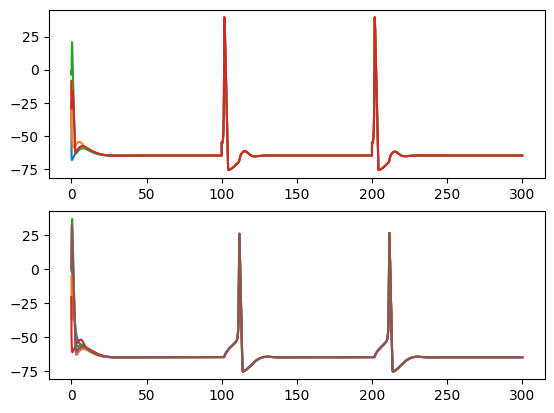

In [325]:
plt.subplot(2, 1, 1)
plt.plot(time, men[:, :4] )
plt.subplot(2, 1, 2)
plt.plot(time, men[:, 4:])
plt.show()